In [347]:
import pandas as pd
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns


In [348]:

df_train = pd.read_csv('train.csv')

In [349]:
df_train.shape

(3000, 23)

In [350]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [351]:
df_train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [352]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [353]:
df_train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [354]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [355]:
print(df_train['revenue'].isna().sum())
print(len(df_train[df_train['revenue'] == 0]))

0
0


Examine Numeric/Datetime Features: Budget, Runtime, Popularity, Release Date

Text(0.5, 1.0, 'Budget vs. Revenue')

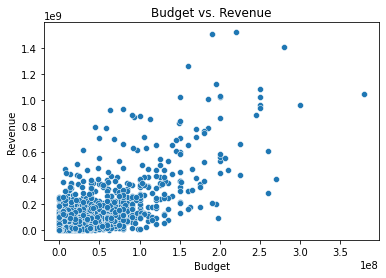

In [356]:

sns.scatterplot(x='budget',y='revenue',data=df_train)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget vs. Revenue')

In [357]:
print(df_train['budget'].isna().sum())
print(len(df_train[df_train['budget'] == 0]))


0
812


0s in budget mean missing values – for now we'll replace with NA

In [358]:
df_train['budget'] = df_train['budget'].replace(0, np.NaN)
print(df_train['budget'].isna().sum())

812


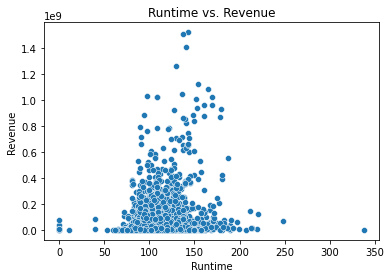

In [359]:

sns.scatterplot(x='runtime',y='revenue',data=df_train)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
plt.title('Runtime vs. Revenue')
plt.show()

In [360]:
print(df_train['runtime'].isnull().sum())
print(len(df_train[df_train['runtime'] == 0]))
print(df_train['runtime'].mean())

2
12
107.85657104736491


There are some missing values in runtime that we will later replace (during preprocessing).

Text(0.5, 1.0, 'Popularity vs. Revenue')

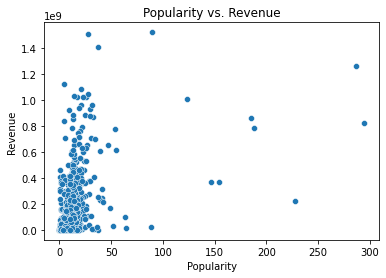

In [361]:

sns.scatterplot(x='popularity',y='revenue',data=df_train)
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs. Revenue')

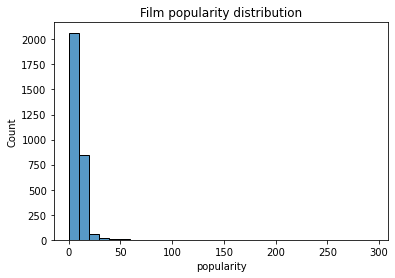

In [362]:
sns.histplot(x='popularity',data=df_train,bins=30)
plt.title('Film popularity distribution')
plt.show()

In [363]:
df_train.popularity.describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

In [364]:
print(df_train[df_train['popularity']>10].shape)
#df_train[df_train['popularity']>10].head()

df_train.sort_values('popularity',ascending=False).head()

(903, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
518,519,"[{'id': 468552, 'name': 'Wonder Woman Collecti...",149000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warnerbros.com/wonder-woman,tt0451279,en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,...,5/30/17,141.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,"[{'id': 849, 'name': 'dc comics'}, {'id': 1701...",NaN,NaN,820580447
684,685,NaN,160000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",http://movies.disney.com/beauty-and-the-beast-...,tt2771200,en,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,...,3/16/17,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Be our guest.,Beauty and the Beast,"[{'id': 254, 'name': 'france'}, {'id': 2343, '...","[{'cast_id': 174, 'character': 'Belle', 'credi...","[{'credit_id': '551879bec3a3681f840004eb', 'de...",1262886337
1695,1696,NaN,34000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,tt3890160,en,Baby Driver,After being coerced into working for a crime b...,228.032744,...,6/28/17,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All you need is one killer track.,Baby Driver,"[{'id': 642, 'name': 'robbery'}, {'id': 2076, ...","[{'cast_id': 9, 'character': 'Baby', 'credit_i...","[{'credit_id': '55c58c009251417a21000e5d', 'de...",224511319
2326,2327,"[{'id': 448150, 'name': 'Deadpool Collection',...",58000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,187.860492,...,2/9/16,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,"[{'id': 2095, 'name': 'anti hero'}, {'id': 307...","[{'cast_id': 99, 'character': 'Wade Wilson / D...","[{'credit_id': '57e564fac3a3681beb0000cc', 'de...",783112979
2126,2127,"[{'id': 284433, 'name': 'Guardians of the Gala...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/movies/movie/221/guardians_o...,tt3896198,en,Guardians of the Galaxy Vol. 2,The Guardians must fight to keep their newfoun...,185.330992,...,4/19/17,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Obviously.,Guardians of the Galaxy Vol. 2,"[{'id': 9663, 'name': 'sequel'}, {'id': 9715, ...","[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",863416141


These seem plausible: originally I was worried that popularity was intended to be on a 1-10 scale and the outliers were errors, but the films on the highest popularity range seem plausible + further examination of the source database online doesn't have information on how popularity is scaled.

It seems instead that popularity is merely a highly skewed metric.

In [365]:
df_train['release_date'] = df_train['release_date'].apply(pd.to_datetime)

In [366]:
print(df_train.release_date.describe(datetime_is_numeric=True))
#data was scraped in 2017, years beyond that are obvious mistakes
print(df_train[df_train['release_date'].dt.year > 2018].shape)

count                             3000
mean     2005-10-31 02:24:57.600000128
min                1972-01-13 00:00:00
25%                1996-02-22 12:00:00
50%                2006-03-26 00:00:00
75%                2012-10-18 12:00:00
max                2071-12-29 00:00:00
Name: release_date, dtype: object
(168, 23)


In [367]:
print(df_train[df_train['release_date'].dt.year > 2017].shape)

(168, 23)


In [368]:
df_train[df_train['release_date'].dt.year > 2017].head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
39,40,NaN,3800000.0,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,...,2065-04-07,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",14873
41,42,NaN,3000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,...,2067-06-22,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16217773
51,52,NaN,12000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,...,2065-07-01,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333
61,62,NaN,4000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,...,2056-05-30,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",14400000
68,69,NaN,2000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,...,2062-12-25,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,To Kill a Mockingbird,"[{'id': 577, 'name': 'black people'}, {'id': 8...","[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de...",13129846


In [369]:
#100 year off mistake
df_train.loc[df_train['release_date'].dt.year > 2017,'release_date'] -= pd.DateOffset(years=100)


Text(0.5, 1.0, 'Revenue of Films over Time')

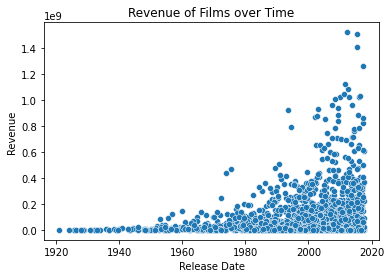

In [370]:
sns.scatterplot(x='release_date',y='revenue',data=df_train)
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.title('Revenue of Films over Time')



Text(0.5, 1.0, 'Release Year vs Average Revenue')

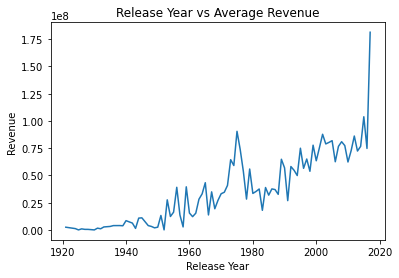

In [371]:
year = df_train['release_date'].dt.year
df_train.groupby(year)['revenue'].mean().plot()
plt.xlabel('Release Year')
plt.ylabel('Revenue');
plt.title("Release Year vs Average Revenue")

Examine Categorical Features:

First we will remove unnecessary features.

In [372]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [373]:
df_train.duplicated('id').sum()
df_train.drop(labels = ['id'],axis =1, inplace=True)

In [374]:
#drop imdb ids
df_train.imdb_id.duplicated().sum()
df_train.drop(labels='imdb_id',axis=1,inplace=True)


In [375]:
#create bool to track existence of homepages, then remove row with links
df_train['homepage_bool'] = df_train['homepage'].notna().astype('int')
df_train['homepage_bool'].sum()
df_train.drop(labels = ['homepage'],axis =1, inplace=True)


In [376]:

print(df_train['belongs_to_collection'].head())
print(df_train['belongs_to_collection'].isna().sum())

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object
2396


In [377]:
#create bool to track belonging to a collection
print(df_train['belongs_to_collection'].value_counts())
print(df_train['belongs_to_collection'].nunique())


df_train['belongs_to_collection_bool'] = df_train['belongs_to_collection'].notna().astype('int')
df_train.drop(labels = ['belongs_to_collection'],axis =1, inplace=True)

[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                      16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]                7
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}]     6
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                  5
[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}]                       5
                                                                                                                                  

In [378]:
#original language
print(df_train['original_language'].isna().sum())
print(df_train['original_language'].value_counts())



0
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64


We will save these to use for dummy variables eventually, but will merge all films with less than 10 movies together.

In [379]:
x = pd.DataFrame(df_train['original_language'].value_counts() < 10)
x.loc['en']

original_language    False
Name: en, dtype: bool

In [380]:

for language in df_train['original_language']:
    if x.loc[language,'original_language']== True:
        df_train.loc[df_train['original_language']==language,'original_language'] = 'no'

In [381]:
df_train.loc[df_train['original_language']=='no','original_language'] = 'small_lang'
df_train['original_language'].value_counts()

en            2575
fr              78
small_lang      61
ru              47
es              43
hi              42
ja              37
it              24
ko              20
cn              20
zh              19
de              18
ta              16
Name: original_language, dtype: int64

In [382]:
#drop original titles
print(df_train.original_title.value_counts())
print(df_train.original_title.nunique())
df_train.drop(labels=['original_title'],axis=1,inplace=True)

Joshua                        2
King Kong                     2
Bad Boys                      2
Black Sheep                   2
Red Dawn                      2
                             ..
To Die For                    1
A Love Song for Bobby Long    1
Dabba                         1
The Bone Collector            1
Abduction                     1
Name: original_title, Length: 2975, dtype: int64
2975


In [383]:
#drop overview
df_train.drop(labels=['overview'],axis=1,inplace=True)

In [384]:
#drop poster path
df_train.drop(labels=['poster_path'],axis=1,inplace=True)

In [385]:


def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d


In [386]:
#production companies 
df_train['production_companies'].value_counts().head(25)

[{'name': 'Paramount Pictures', 'id': 4}]                                                               51
[{'name': 'Universal Pictures', 'id': 33}]                                                              36
[{'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]                                                     32
[{'name': 'Warner Bros.', 'id': 6194}]                                                                  32
[{'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]                                         24
[{'name': 'Touchstone Pictures', 'id': 9195}]                                                           17
[{'name': 'New Line Cinema', 'id': 12}]                                                                 17
[{'name': 'Columbia Pictures', 'id': 5}]                                                                17
[{'name': 'TriStar Pictures', 'id': 559}]                                                               16
[{'name': 'Orion Pictures', 'id': 41}

In [387]:

df_train['prod_companies'] = pd.Series(dtype='object')
j = 0
for i in df_train['production_companies']:
    d = get_dictionary(i)
    if d != {}:
        df_train['prod_companies'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['prod_companies'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels='production_companies',axis=1,inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [388]:
#production countries
df_train['production_countries'].value_counts()
df_train['prod_country'] = pd.Series(dtype='object')
j = 0
for i in df_train['production_countries']:
    d = get_dictionary(i)
    if d != {}:
        df_train['prod_country'].iloc[j] = [d[x]['name'] for x in range(0,len(d))]

    else:
         df_train['prod_country'].iloc[j] = np.NaN
    j += 1

df_train.drop(labels=['production_countries'],axis=1,inplace=True)


In [389]:
df_train['prod_country'].head(10)

0            [United States of America]
1            [United States of America]
2            [United States of America]
3                               [India]
4                         [South Korea]
5                                   NaN
6    [United States of America, Canada]
7                                   NaN
8            [United States of America]
9            [United States of America]
Name: prod_country, dtype: object

In [390]:
#create bool to track if film is a usa production
print(df_train['prod_country'].isna().sum())
df_train['prod_country'].fillna('',inplace=True)
df_train['usa_production'] = [1 if 'United States of America' in x else 0 for x in df_train['prod_country']]
df_train['prod_country'] = df_train['prod_country'].replace('', np.NaN)
df_train['usa_production']

55


0       1
1       1
2       1
3       0
4       0
       ..
2995    1
2996    0
2997    1
2998    1
2999    1
Name: usa_production, Length: 3000, dtype: int64

We will make note of those movies that were produced by one of the top production companies according to Wikipedia (https://en.wikipedia.org/wiki/Major_film_studios#Overview) and are in fact accordingly more frequent in our data.

In [395]:
major_studios_list = ['Paramount Pictures','Universal Pictures','Warner Bros.',
                 'Metro-Goldwyn-Mayer (MGM)','Fox','Columbia Pictures','Walt Disney Pictures']

In [424]:
for studio in major_studios_list:
    df_train[studio] = 0
    
df_train.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_country',
       'usa_production', 'Paramount Pictures', 'Universal Pictures',
       'Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)', 'Fox', 'Columbia Pictures',
       'Walt Disney Pictures'],
      dtype='object')

In [470]:
df_train.prod_companies.fillna('None',inplace=True)

In [498]:
for i in range(len(df_train)):
    for studio in major_studios_list:
        if len(df_train.iloc[i]['prod_companies']) > 1:
            for prod_co in df_train.iloc[i]['prod_companies']:
                if studio in prod_co:
                    df_train.loc[i,studio] = 1
        else:
            if studio in df_train.iloc[i]['prod_companies'][0]:
                df_train.loc[i,studio] = 1
            

In [499]:
df_train['Warner Bros.'].sum()
#df_train.prod_companies.isna().sum()

213

In [500]:
df_train.head()

,budget,genres,original_language,popularity,release_date,runtime,spoken_languages,status,tagline,title,...,prod_companies,prod_country,usa_production,Paramount Pictures,Universal Pictures,Warner Bros.,Metro-Goldwyn-Mayer (MGM),Fox,Columbia Pictures,Walt Disney Pictures
0,14000000.0,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,...,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],1,1,0,0,1,0,0,0
1,40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,...,[Walt Disney Pictures],[United States of America],1,0,0,0,0,0,0,1
2,3300000.0,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,...,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],1,0,0,0,0,0,0,0
3,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,...,None,[India],0,0,0,0,0,0,0,0
4,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,...,None,[South Korea],0,0,0,0,0,0,0,0


In [501]:
#spoken languages 
#df_train['spoken_languages'] = pd.DataFrame()
df_train['lang_num'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['spoken_languages']:
    d = get_dictionary(i)
    if d != {}:
        df_train['lang_num'].iloc[j] = len(d)
    else:
        df_train['lang_num'].iloc[j] = np.NaN
    j += 1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [502]:
df_train['spoken_languages'].nunique()

401

In [503]:
df_train.drop(labels=['spoken_languages'],axis=1,inplace=True)

df_train['lang_num'].head()

0    1.0
1    1.0
2    1.0
3    2.0
4    1.0
Name: lang_num, dtype: float64

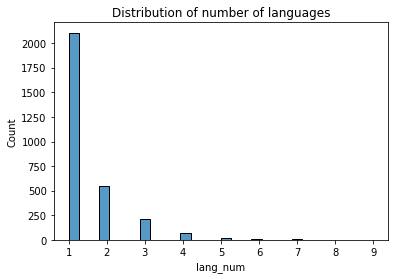

In [504]:
sns.histplot(x='lang_num',data=df_train,bins=30)
plt.title('Distribution of number of languages')
plt.show()

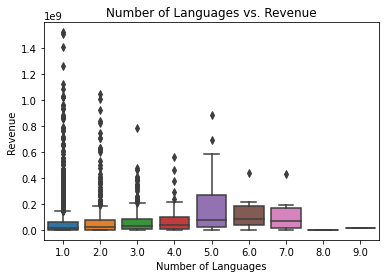

In [505]:

sns.boxplot(x='lang_num',y='revenue',data=df_train)
plt.xlabel('Number of Languages')
plt.ylabel('Revenue')
plt.title('Number of Languages vs. Revenue')
plt.show()

In [506]:
#status 
print(df_train['status'].value_counts())
df_train = df_train.drop(labels='status',axis=1)

Released    2996
Rumored        4
Name: status, dtype: int64


This is not a useful category given our area of interest – rumored films are beyond our scope.

In [507]:
#tagline
print(df_train['tagline'].isna().sum())
#create bool for tracking existence of tagline 
df_train['has_tagline'] = df_train['tagline'].notna().astype('int')

df_train.drop(labels=['tagline'],axis=1,inplace=True)


597


In [508]:
#drop title
df_train['title']
df_train.drop(labels=['title'],axis=1,inplace=True)

In [509]:
#cast_size

df_train['cast_size'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['cast']:
    d = get_dictionary(i)
    if d != {}:
        df_train['cast_size'].iloc[j] = len(d)
    else:
        df_train['cast_size'].iloc[j] = np.NaN
    j += 1
df_train['cast_size']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       24.0
1       20.0
2       51.0
3        7.0
4        4.0
        ... 
2995    15.0
2996    11.0
2997    15.0
2998    26.0
2999    34.0
Name: cast_size, Length: 3000, dtype: float64

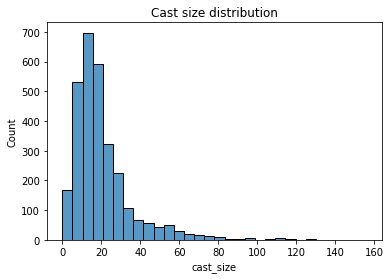

In [510]:
sns.histplot(x='cast_size',data=df_train,bins=30)
plt.title('Cast size distribution')
plt.show()

Text(0.5, 1.0, 'Cast size vs. Revenue')

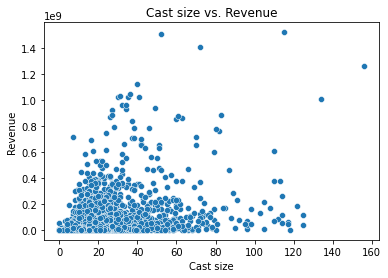

In [511]:

sns.scatterplot(x='cast_size',y='revenue',data=df_train)
plt.xlabel('Cast size')
plt.ylabel('Revenue')
plt.title('Cast size vs. Revenue')


In [512]:
#crew size

df_train['crew_size'] = pd.Series(dtype=np.int64)
j = 0
for i in df_train['crew']:
    d = get_dictionary(i)
    if d != {}:
        df_train['crew_size'].iloc[j] = len(d)
    else:
        df_train['crew_size'].iloc[j] = np.NaN
    j += 1
df_train['crew_size']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0       72.0
1        9.0
2       64.0
3        3.0
4        2.0
        ... 
2995    17.0
2996    15.0
2997    10.0
2998    89.0
2999    48.0
Name: crew_size, Length: 3000, dtype: float64

Text(0.5, 1.0, 'Crew size vs. Revenue')

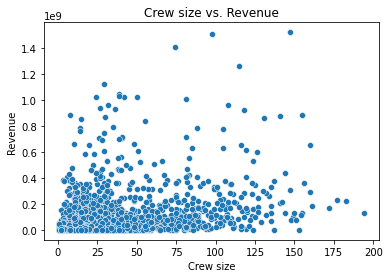

In [513]:

sns.scatterplot(x='crew_size',y='revenue',data=df_train)
plt.xlabel('Crew size')
plt.ylabel('Revenue')
plt.title('Crew size vs. Revenue')


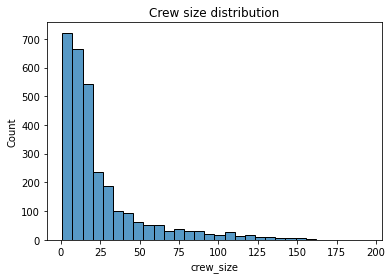

In [514]:
sns.histplot(x='crew_size',data=df_train,bins=30)
plt.title('Crew size distribution')
plt.show()

As of right now we will keep the original cast and crew variables with every director/actor/crewmember's information, though I don't believe they will be of particular use going forward, as this information is very film specific. 

In [515]:
df_train.crew[0]

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

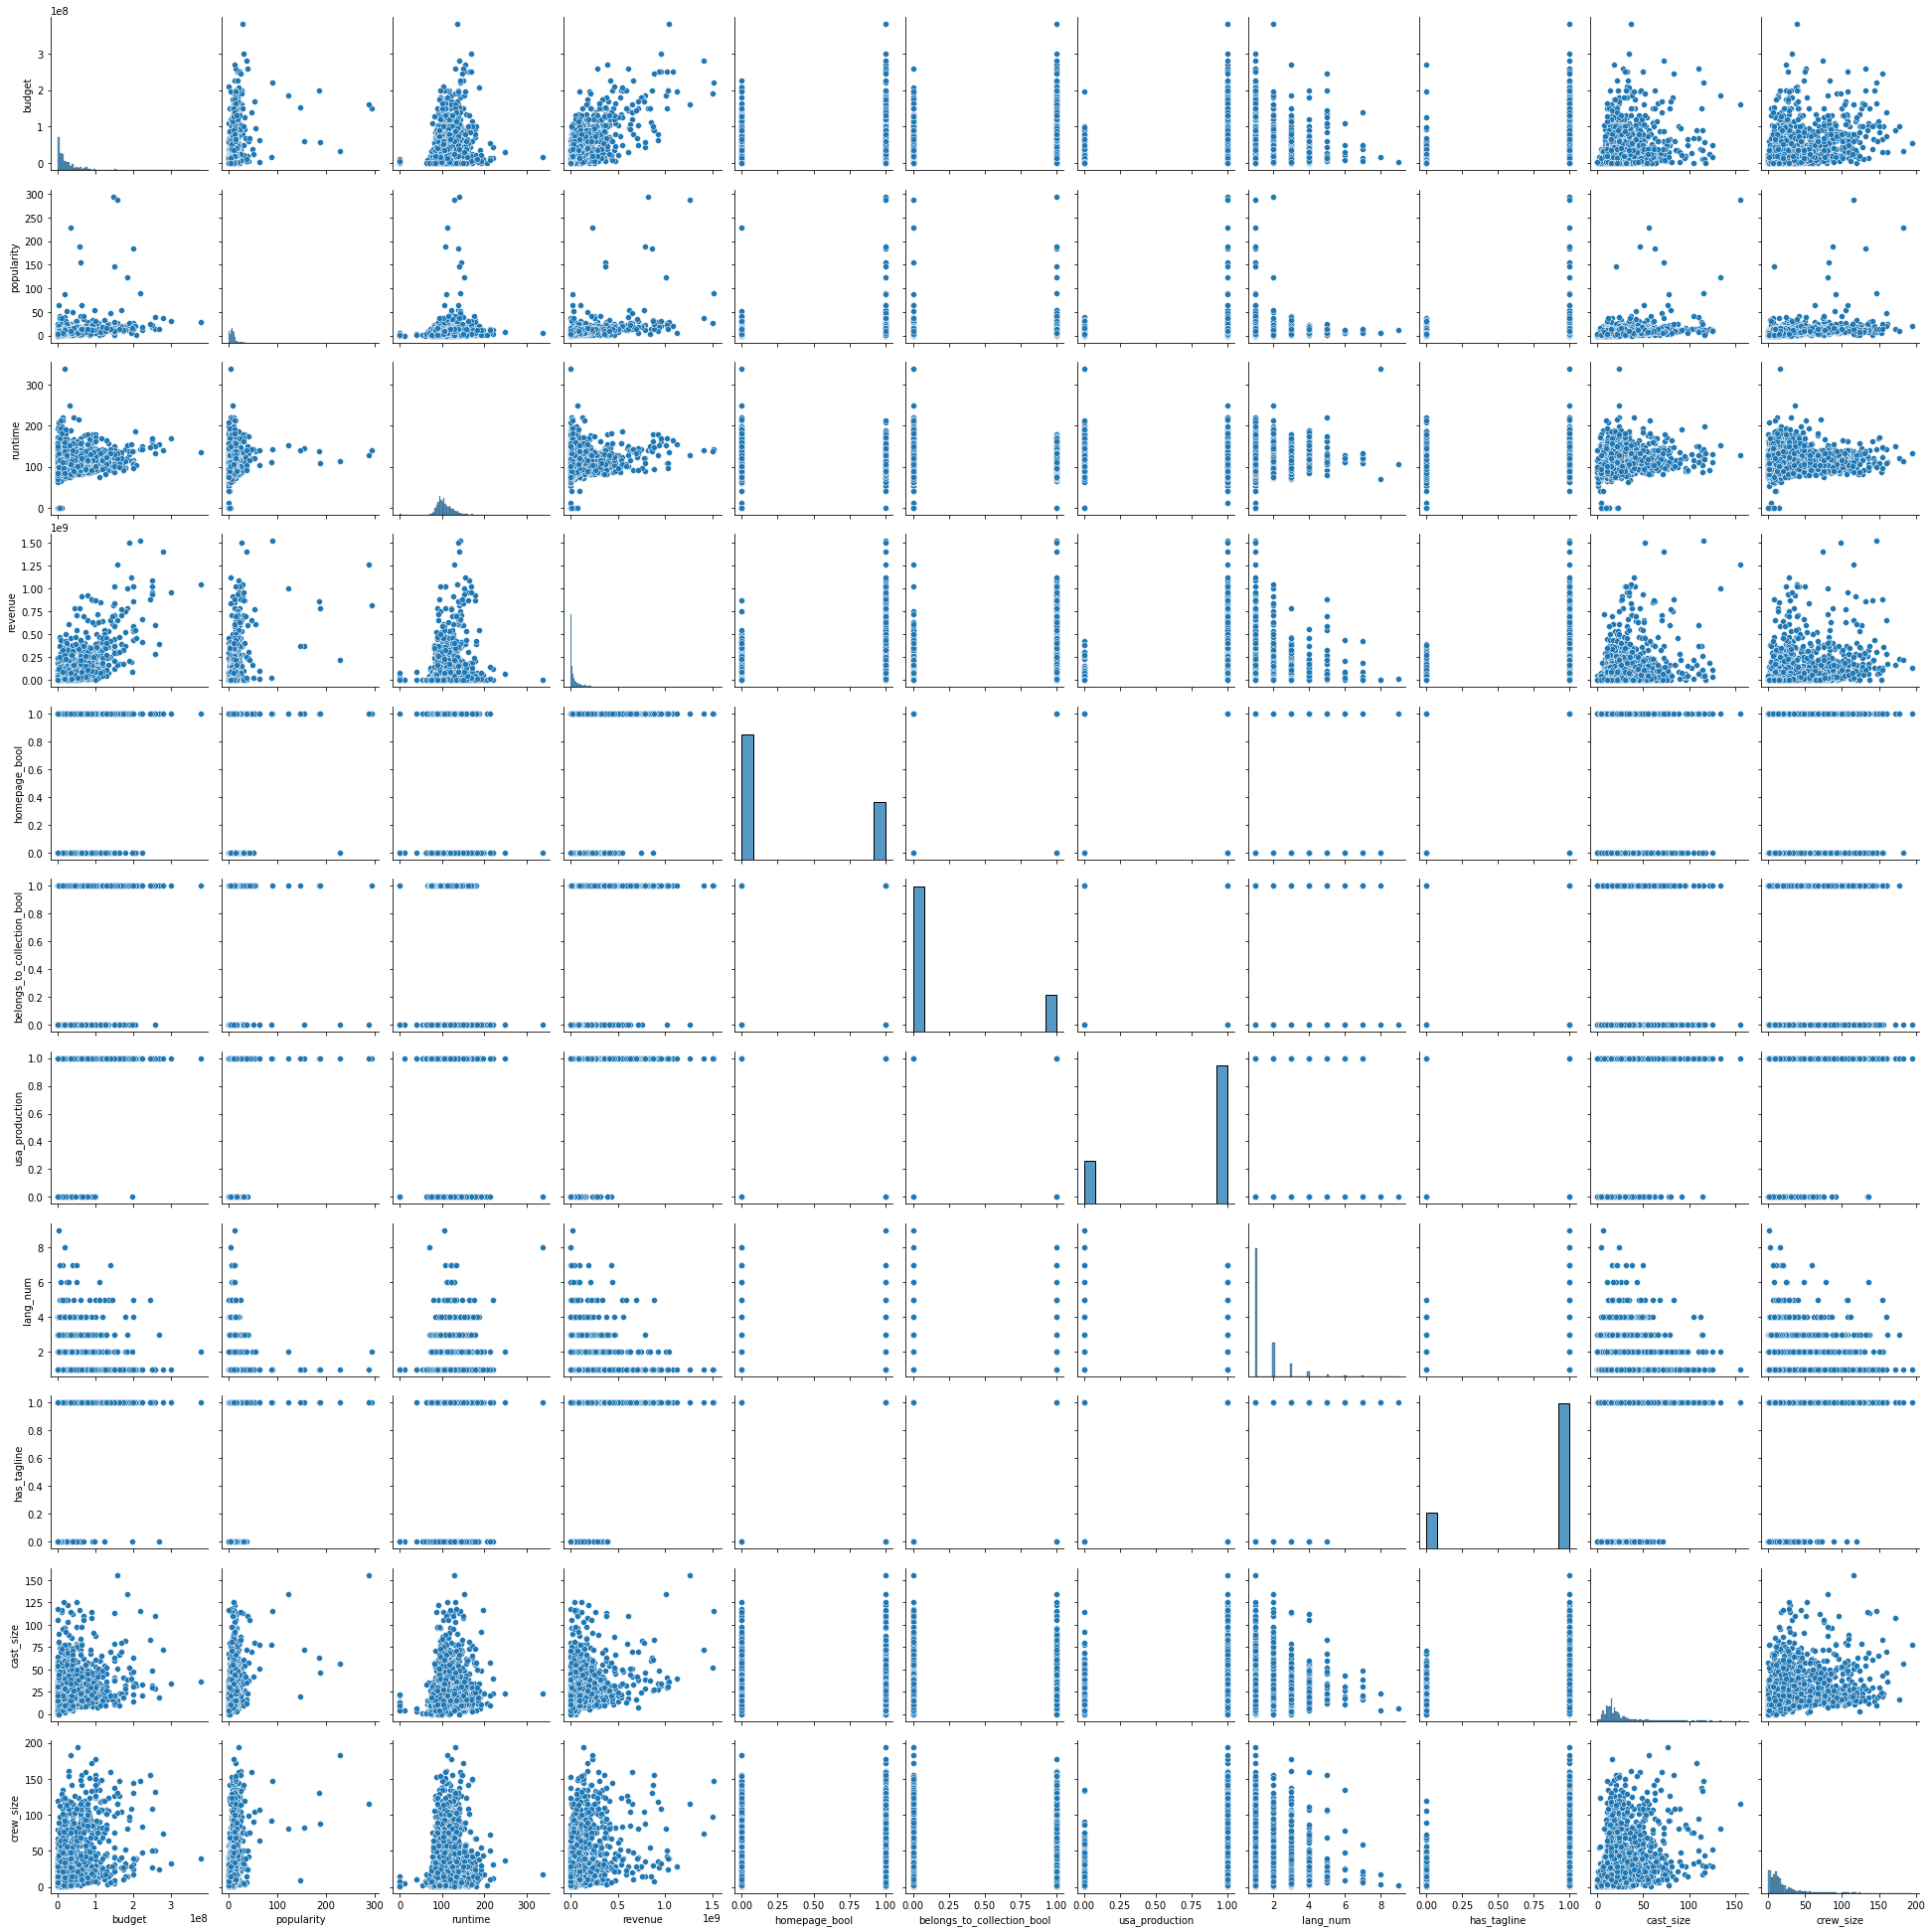

In [516]:
#pandas profiling
sns.pairplot(df_train.drop(labels=major_studios_list,axis=1))
plt.show()

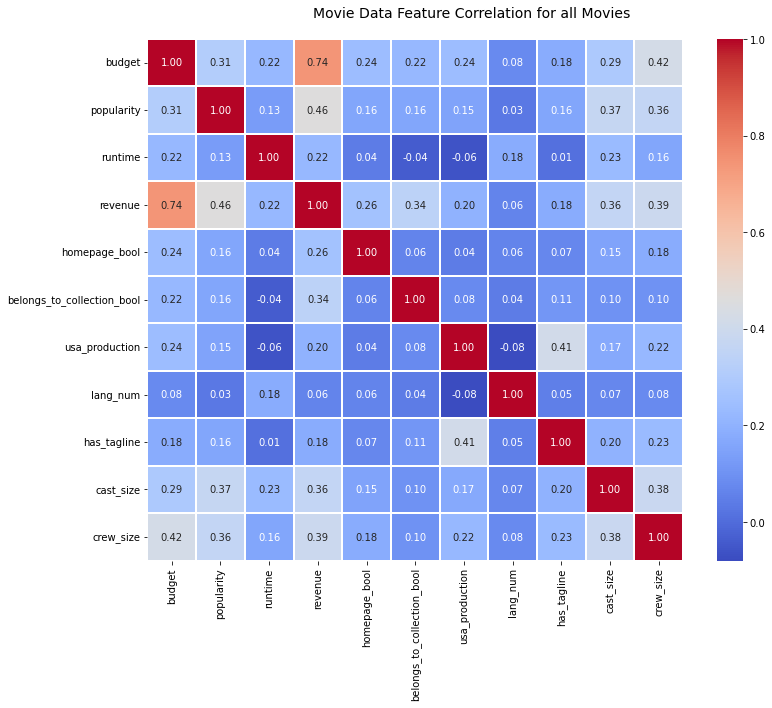

In [518]:

#correlation matrix 
corrmat = df_train.drop(labels=major_studios_list,axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Data Feature Correlation for all Movies', fontsize=14)

There are several promising correlations with revenue among our numeric and boolean features, including budget (the strongest correlation), popularity, crew and cast-size, as well as collection status. In order to further examine the role of remaining categorical values (genre, original language, possibly some features tied to keywords and production company), further EDA is necessary.

In [520]:
print(df_train.shape)
print(df_train.columns)

(3000, 26)
Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'Keywords', 'cast', 'crew', 'revenue', 'homepage_bool',
       'belongs_to_collection_bool', 'prod_companies', 'prod_country',
       'usa_production', 'Paramount Pictures', 'Universal Pictures',
       'Warner Bros.', 'Metro-Goldwyn-Mayer (MGM)', 'Fox', 'Columbia Pictures',
       'Walt Disney Pictures', 'lang_num', 'has_tagline', 'cast_size',
       'crew_size'],
      dtype='object')




There were originally 3000 rows x 23 columns worth of data. The clean version includes 3000 rows x 26 columns of data.

However, many of the original columns have been dropped. We removed columns that were only useful for id purposes (imdb ids, ids, original titles, titles, descriptions, and internet links), as well as film status, because the 4 unreleased films are beyond the scope of our study. We replaced columns with homepage and tagline information with booleans tracking their existence.

We created new features to track the cast size, crew size, and number of spoken languages. We lowered the cardinality of original language features by grouping together all films produced in a language with less than 10 films produced over the period. 

We created a set of new variables to track whether films were produced by one of the main production studios.

We will need to explore keyword and genre name for further analysis. Though we retained further information on cast and crew, we did not particularly clean these variables as they do not seem as though they will be of particular use in the future. We might do more work with them in later steps, however, so they will stay in our dataset for now.

Around 25% of budgets are missing, which is unfortunate, as budgets have an evidently strong correlation with revenue already.

At this point, we have several features that could potentially play a role in predicting revenue, including budget, cast and crew size, and popularity, and more. Moving forward, we will continue to examine these features, as well as further examine the role genre plays on revenue.

In [521]:
# save the data to a new csv file
df_train.to_csv('movies.csv')